In [12]:
import pandas as pd
import xlrd

xls = pd.ExcelFile(r"WeatherData.xls")
df = xls.parse(0)

display(df)
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Region1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Region1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Region1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Region1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Region1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36524,2017-06-21,Region12,8.6,18.6,0.2,SSW,56.0,NNW,S,13.0,...,69.0,67.0,1025.7,1025.3,2.0,2.0,13.3,17.7,No,No
36525,2017-06-22,Region12,9.5,17.8,0.2,SW,35.0,NNW,SSE,9.0,...,74.0,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,No,No
36526,2017-06-23,Region12,8.7,19.4,0.0,NNW,30.0,NW,NW,13.0,...,83.0,57.0,1020.8,1014.7,6.0,6.0,10.9,18.2,No,No
36527,2017-06-24,Region12,9.4,19.9,0.0,SW,43.0,WNW,W,22.0,...,61.0,41.0,1017.3,1015.2,5.0,2.0,12.9,19.3,No,No


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,36029.000000,36160.000000,35839.000000,31597.000000,35698.000000,35054.000000,35862.000000,35196.000000,29837.000000,29846.000000,20712.000000,20390.000000,36092.000000,35424.000000
mean,13.413489,23.956333,2.696772,38.360287,12.662978,17.413904,70.032820,52.508581,1018.259165,1015.698485,4.312331,4.401422,17.861931,22.478128
std,5.723398,5.914569,9.410816,13.706660,9.126107,9.316727,17.508474,20.387986,6.648539,6.597083,2.913795,2.703880,5.290466,5.750985
min,-4.800000,6.800000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,9.200000,19.500000,0.000000,30.000000,6.000000,11.000000,58.000000,37.000000,1013.800000,1011.300000,1.000000,2.000000,14.100000,18.200000
50%,14.000000,23.400000,0.000000,37.000000,11.000000,17.000000,71.000000,53.000000,1018.300000,1015.800000,5.000000,5.000000,18.300000,21.800000
75%,18.000000,27.500000,0.800000,46.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.200000,7.000000,7.000000,21.800000,25.900000
max,29.700000,47.300000,371.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.000000,9.000000,8.000000,37.700000,46.700000


<AxesSubplot: >

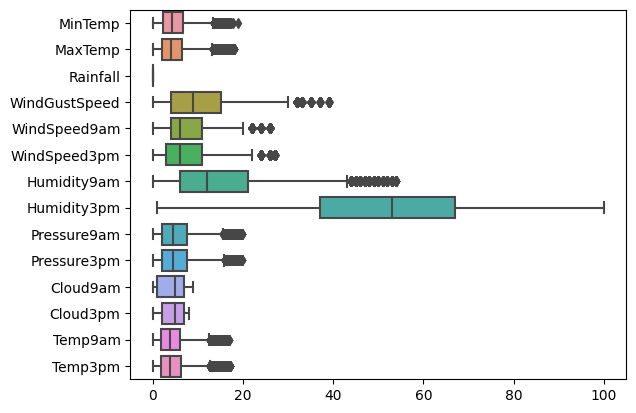

In [13]:
#Remove Outliers
# IQR
import seaborn as sns
def remove_outlier_Hampel(df):
    med=df.median()
    List=abs(df-med)
    cond=List.median()*4.5
    good_list=List[~(List>cond)]
    return good_list
outlier_columns=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Temp9am','Temp3pm','Pressure9am','Pressure3pm']
df[outlier_columns]=remove_outlier_Hampel(df[outlier_columns])
sns.boxplot(data=df, orient="h")

In [14]:
#Adding Constants(min value) instead of Null Values for Numeric Columns
#Dropping Rows with Null Categorical Value

values={"MinTemp":-4.8,"MaxTemp":6.8,"Temp9am":0.3,"Temp3pm":6.4,"Cloud9am": 0,"Cloud3pm": 0,"Rainfall": 2.696772,"WindGustSpeed": 7,"WindSpeed9am":0,"WindSpeed3pm":0,"Pressure9am": 980.0,"Pressure3pm": 980.0,'Humidity9am': 1,'Humidity3pm': 1}
df.fillna(value=values,inplace=True)
df.dropna(subset=["WindGustDir","WindDir9am","WindDir3pm","RainTomorrow","RainToday"],inplace=True)
df.describe()
display(df)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Region1,0.6,0.5,2.696772,W,7.0,W,WNW,9.0,...,0.0,22.0,10.6,8.7,8.0,0.0,1.4,0.0,No,No
1,2008-12-02,Region1,6.6,1.7,0.000000,WNW,7.0,NNW,WSW,7.0,...,27.0,25.0,7.7,8.0,0.0,0.0,1.1,2.5,No,No
2,2008-12-03,Region1,1.1,2.3,0.000000,WSW,9.0,W,WSW,8.0,...,33.0,30.0,10.7,7.1,0.0,2.0,2.7,1.4,No,No
3,2008-12-04,Region1,4.8,4.6,0.000000,NE,13.0,SE,E,0.0,...,26.0,16.0,0.7,3.0,0.0,0.0,0.2,4.7,No,No
4,2008-12-05,Region1,3.5,8.9,2.696772,W,4.0,ENE,NW,4.0,...,11.0,33.0,7.5,9.8,7.0,8.0,0.5,7.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36524,2017-06-21,Region12,5.4,4.8,2.696772,SSW,19.0,NNW,S,2.0,...,2.0,67.0,7.4,9.5,2.0,2.0,5.0,4.1,No,No
36525,2017-06-22,Region12,4.5,5.6,2.696772,SW,2.0,NNW,SSE,2.0,...,3.0,70.0,10.0,8.8,2.0,2.0,4.0,5.0,No,No
36526,2017-06-23,Region12,5.3,4.0,0.000000,NNW,7.0,NW,NW,2.0,...,12.0,57.0,2.5,1.1,6.0,6.0,7.4,3.6,No,No
36527,2017-06-24,Region12,4.6,3.5,0.000000,SW,6.0,WNW,W,11.0,...,10.0,41.0,1.0,0.6,5.0,2.0,5.4,2.5,No,No


In [15]:
#Changing Rain Tommorow and Today to Binary
df["RainTomorrow"].replace(['No', 'Yes'],[0, 1], inplace=True)
df["RainToday"].replace(['No', 'Yes'],[0, 1], inplace=True)
df["Location"].replace(["Region1","Region2","Region3","Region4","Region5","Region6","Region7","Region8","Region9","Region10","Region11","Region12"]
                       ,[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
print(df)

            Date  Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0     2008-12-01         1      0.6      0.5  2.696772           W   
1     2008-12-02         1      6.6      1.7  0.000000         WNW   
2     2008-12-03         1      1.1      2.3  0.000000         WSW   
3     2008-12-04         1      4.8      4.6  0.000000          NE   
4     2008-12-05         1      3.5      8.9  2.696772           W   
...          ...       ...      ...      ...       ...         ...   
36524 2017-06-21        12      5.4      4.8  2.696772         SSW   
36525 2017-06-22        12      4.5      5.6  2.696772          SW   
36526 2017-06-23        12      5.3      4.0  0.000000         NNW   
36527 2017-06-24        12      4.6      3.5  0.000000          SW   
36528 2017-06-25        12      7.2      3.9  0.000000         WSW   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0                7.0          W        WNW           9.0  ...          0.0   
1  

In [16]:
#Pre-Pruning

In [17]:
from sklearn.model_selection import train_test_split # Import train_test_split function

feature_cols=['RainToday','MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed3pm','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
X=df[feature_cols]
Y=df['RainTomorrow']
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1)


In [18]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

max_depth_list = [3, 5, 7, 9, 11, 13, 15]

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Iterate through each max_depth value
for max_depth in max_depth_list:
    # Train a Decision Tree model with the current max_depth
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Evaluate the model on the validation set
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    # Store the accuracy score
    accuracy_scores.append(accuracy)

# Find the max_depth value with the highest accuracy score
best_max_depth = max_depth_list[accuracy_scores.index(max(accuracy_scores))]

data = {'Max Depth': max_depth_list, 'Accuracy Score': accuracy_scores}
dfMaxDepth = pd.DataFrame(data)
display(dfMaxDepth)

,Max Depth,Accuracy Score
0,3,0.846208
1,5,0.849030
2,7,0.847619
3,9,0.842328
4,11,0.825750
5,13,0.807055
6,15,0.793651


In [21]:
model = DecisionTreeClassifier(max_depth=best_max_depth)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8388575458392101


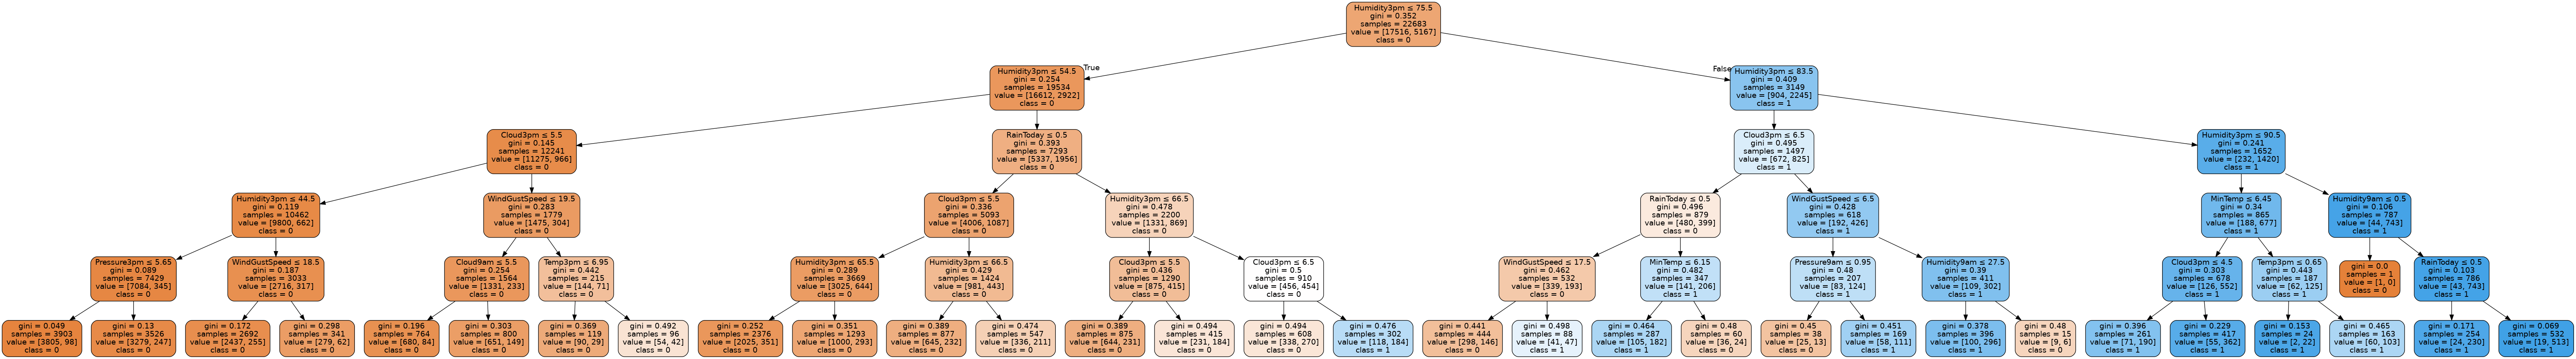

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('WeatherDecisionTree.png')
Image(graph.create_png())
